### Regresion logistica para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data= pd.read_csv(r"Hola\python-ml-course-master\datasets\bank\bank.csv", sep=";")
data= pd.read_csv(r"bank.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [5]:
  data["y"]= (data["y"]=="yes").astype(int)

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
data["education"]= np.where(data["education"]=="basic.9y", "Basic", data["education"])
data["education"]= np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"]= np.where(data["education"]=="basic.4y", "Basic", data["education"])

data["education"]= np.where(data["education"]=="high.school", "High School", data["education"])
data["education"]= np.where(data["education"]=="university.degree", "University Degree", data["education"])
data["education"]= np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"]= np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"]= np.where(data["education"]=="'unknown", "Unknown", data["education"])


In [9]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'unknown', 'Illiterate'], dtype=object)

In [10]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra')

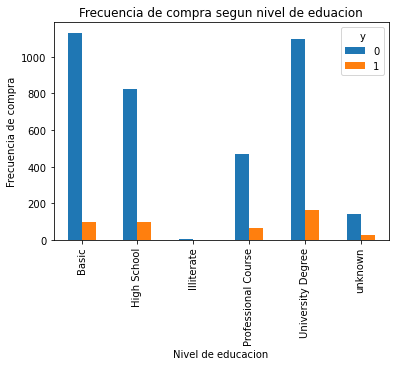

In [13]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra segun nivel de eduacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra")

Text(0.5, 1.0, 'Estado civil contra el nivel de compras')

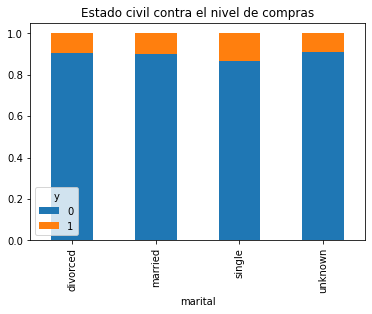

In [14]:
table= pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind= "bar", stacked=True)
plt.title("Estado civil contra el nivel de compras")

### Conversion de variables categoricas a variables dummies 

In [15]:
categorias = ["job", "marital", "education", "default", "housing", "loan", "contact",
              "month", "day_of_week", "poutcome"]
for category in  categorias:
    cat_dumy= pd.get_dummies(data[category], prefix =category)
    data_new= data.join(cat_dumy)
    data=data_new

In [16]:
data_vars= data.columns.values.tolist()

In [17]:
data_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month

In [18]:
to_kepp = [v for v in data_vars if v not in categorias]
to_kepp = [v for v in to_kepp if v not in ["default"]]

In [19]:
bank_data = data[to_kepp]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [20]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Seleccion de rasgos para el modelo

In [21]:
n= 12

In [22]:
from sklearn import datasets
from  sklearn.feature_selection  import RFE
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
rfe = RFE(lr, n_features_to_select=12)
bank_data[X]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [25]:
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [26]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False  True False  True False False
  True  True  True False False False False False False False  True False
  True]


In [27]:
bank_data[X]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [28]:
print(rfe.ranking_)

[32 44 20 47  1 19 26 24  1 41  2 13 11 42 12  1  8 33  3  1  1 46 17 36
 31 49 30 14 48 21 35  7 38 27 50  9 16 45 15 22 40  5 25  1  6  1 23  4
  1  1  1 39 18 43 28 37 29 10  1 34  1]


In [29]:
z= zip(bank_data_vars, rfe.support_, rfe.ranking_)
z

In [30]:
list(z)

[('age', False, 32),
 ('duration', False, 44),
 ('campaign', False, 20),
 ('pdays', False, 47),
 ('previous', True, 1),
 ('emp.var.rate', False, 19),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 24),
 ('euribor3m', True, 1),
 ('nr.employed', False, 41),
 ('y', False, 2),
 ('job_admin.', False, 13),
 ('job_blue-collar', False, 11),
 ('job_entrepreneur', False, 42),
 ('job_housemaid', False, 12),
 ('job_management', True, 1),
 ('job_retired', False, 8),
 ('job_self-employed', False, 33),
 ('job_services', False, 3),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 46),
 ('job_unknown', False, 17),
 ('marital_divorced', False, 36),
 ('marital_married', False, 31),
 ('marital_single', False, 49),
 ('marital_unknown', False, 30),
 ('education_Basic', False, 14),
 ('education_High School', False, 48),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 35),
 ('education_University Degree', False, 7),
 ('education_unk

In [31]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [32]:
X = bank_data[cols]
Y = bank_data["y"]

### Implementacion del modelo en Python con stastmodel.api

In [33]:
import statsmodels.api as sm

In [34]:
logic_model= sm.Logit(Y, X)

In [35]:
result =logic_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [36]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2022-02-12 20:14  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implememtacion del modelo Python con scikit-learn

In [37]:
from sklearn import linear_model

In [38]:
logic_model = linear_model.LogisticRegression()
logic_model.fit(X, Y)

LogisticRegression()

In [39]:
logic_model.score(X, Y)

0.8958485069191552

In [40]:
Y.mean()

0.10949259529011895

In [41]:
pd.DataFrame(list(zip(X.columns, np.transpose(logic_model.coef_))))

,0,1
0,previous,[0.5362541179381511]
1,euribor3m,[-0.5443670397996976]
2,job_blue-collar,[-0.35331387435015116]
3,job_retired,[0.36165159081107845]
4,month_aug,[0.629258889507326]
5,month_dec,[1.194397457212275]
6,month_jul,[0.9630554140669418]
7,month_jun,[1.0566897056471736]
8,month_mar,[1.6386680234596926]
9,month_nov,[0.45770841910617377]


### Validacion del modelo Logistico

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test=  train_test_split(X, Y, test_size=0.3, random_state=0)

In [44]:
lm= linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [45]:
probs= lm.predict_proba(X_test)

In [46]:
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [47]:
prediction= lm.predict(X_test)

In [48]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from IPython.display import  Math, display, Latex

In [50]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [51]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [52]:
prob = probs[:,1]
prob_df= pd.DataFrame(prob)
treshold= 0.1
prob_df["predicition"]= np.where(prob_df[0]>treshold, 1, 0)

In [53]:
prob_df

,0,predicition
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0
...,...,...
1231,0.062222,0
1232,0.062157,0
1233,0.349016,1
1234,0.026190,0


In [54]:
pd.crosstab(prob_df.predicition, columns="Coun")

col_0,Coun
predicition,
0,846
1,390


In [55]:
390/len(prob_df)*100

31.55339805825243

In [56]:
from sklearn import metrics

In [57]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

### Validacion cruzada

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
score= cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [60]:
score

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [61]:
score.mean()

0.8943903101599225

### Matrices de confucion y curvas ROC

In [62]:
x_traing, x_test, y_traing, y_test= train_test_split(X, Y, test_size=0.3, random_state=0)

In [63]:
lm=linear_model.LogisticRegression()
lm.fit(x_traing, y_traing)

LogisticRegression()

In [64]:
probs= lm.predict_proba(x_test)

In [65]:
prob= probs[:,1]
prob_df = pd.DataFrame(prob)

In [66]:
threshold=0.1
prob_df["predicition"]= np.where(prob_df[0]>=threshold, 1, 0)
prob_df["actual"]= list(y_test)
prob_df.head()

,0,predicition,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0


In [67]:
cofussion_matrix= pd.crosstab(prob_df.actual, prob_df.predicition)
cofussion_matrix

predicition,0,1
actual,,
0,806,308
1,40,82


In [68]:
TN=cofussion_matrix[0][0]
TP=cofussion_matrix[1][1]
FN=cofussion_matrix[0][1]
FP=cofussion_matrix[1][0]

sens = TP/(TP+FN)
sens

0.6721311475409836

In [69]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.2764811490125674

In [70]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensibilidad=[1]
especifities=[1]

for t in thresholds:
    prob_df["predicition"]= np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"]= list(y_test)
    prob_df.head()

    cofussion_matrix= pd.crosstab(prob_df.actual, prob_df.predicition)
    cofussion_matrix

    TN=cofussion_matrix[0][0]
    TP=cofussion_matrix[1][1]
    FN=cofussion_matrix[0][1]
    FP=cofussion_matrix[1][0]

    sens = TP/(TP+FN)
    sens
    sensibilidad.append(sens)
    espc_1 = 1-TN/(TN+FP)
    espc_1
    especifities.append(espc_1)

In [71]:
sensibilidad

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115]

In [72]:
especifities

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312]

In [73]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

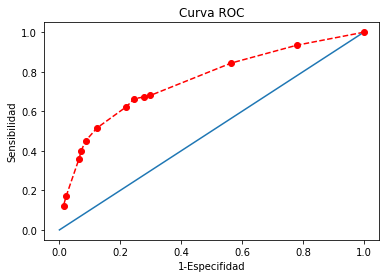

In [74]:
%matplotlib inline
plt.plot(especifities, sensibilidad, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [75]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [76]:
df = pd.DataFrame({
    "x":espc_1,
    "y":sensit
})


In [77]:
df.head()

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


In [78]:
%matplotlib inline
import plotnine as p9

In [84]:
from plotnine import ggplot, aes, geom_line
from plotnine import *


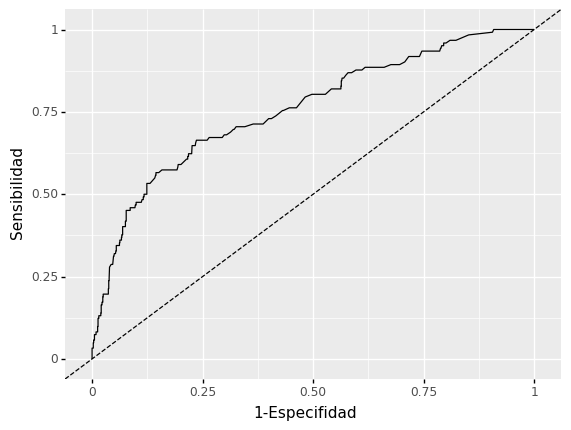

<ggplot: (116240787447)>

In [86]:
ggplot(df, aes(x="x", y="y")) +geom_line() + geom_abline(linetype="dashed")+xlim(-0.01,1.01)+ylim(-0.01,1.01)+xlab("1-Especifidad")+ylab("Sensibilidad")

In [94]:
AREA= metrics.auc(espc_1, sensit)
AREA

0.7579171204049798

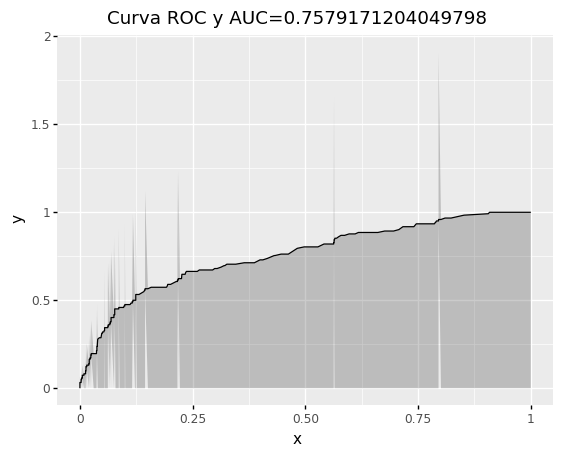

<ggplot: (116240868289)>

In [95]:
ggplot(df, aes(x="x", y="y")) + geom_area(alpha=0.25)+geom_line(aes(y="y"))+ggtitle("Curva ROC y AUC=%s"%str(AREA))